In [1]:
import pandas as pd
import numpy as np
import glob

# 数据预处理

## 评论汇总

In [15]:
rdf_list = []
for file in glob.glob('./clean/*.csv'):
    tp = file.split('\\')[-1].split('.')[0]
    if tp in ['total_reviews', 'result_fix']:
        continue
    temp = pd.read_csv(file)
    temp['评论id'] = temp['评论id'].astype(str)
    temp['来源'] = tp
    if tp == 'short':
        dramma = pd.read_excel('./采集/短评.xlsx')
        dramma['短评id'] = dramma['短评id'].astype(str)
        temp = temp.merge(dramma[['电视剧名称', '短评id']], left_on='评论id', right_on='短评id')
        temp.drop('短评id', inplace=True, axis=1)
    elif tp == 'long':
        dramma = pd.read_excel('./采集/长评.xlsx')
        dramma['影评id'] = dramma['影评id'].astype(str)
        temp = temp.merge(dramma[['电视剧名称', '影评id']], left_on='评论id', right_on='影评id')
        temp.drop('影评id', inplace=True, axis=1)
    else:
        dramma = pd.read_excel('./采集/讨论组-主贴.xlsx')
        dramma['帖子id'] = dramma['帖子id'].astype(str)
        temp = temp.merge(dramma[['电视剧名称', '帖子id']], left_on='评论id', right_on='帖子id')
        temp.drop('帖子id', inplace=True, axis=1)
    rdf_list.append(temp)
rdf = pd.concat(rdf_list, axis=0)
rdf

,评论id,评论内容,来源,电视剧名称
0,318794163,标题：不知道这部剧里又会callback李导的哪部剧？,group,180天重启计划
1,318817291,脸型发型在努力靠近了，痞帅风；看预告感觉陈老师打扮得挺潮的；我觉得还蛮像的诶；还行。陈老年之...,group,180天重启计划
2,319246594,顾云苏就是所有普通女生的一个缩影，很能让人共情到的一个女主。她跟男朋友吵架的时候，说的不是‘...,group,180天重启计划
3,319311077,剧本设置得很好，突出了女性在婚姻中情感需求的重要性，展现了非传统离婚原因的现实困境。剧中吴俪...,group,180天重启计划
4,319239987,连追四集，太精彩了，周雨彤一人分饰两角，拿捏到位，绝不串戏，感觉她演技又进步了！好剧好演员，...,group,180天重启计划
...,...,...,...,...
6385,4518592097,男高偷拍传播yhsq作为检察官说这很正常还一直在洗666,short,﻿无尽的尽头
6386,4517222924,没有这种深度尺度就不要学人少年法庭拍这种剧了，打着聚焦未成年犯罪的噱头…,short,﻿无尽的尽头
6387,4519184797,唯一的亮点就是未检题材。,short,﻿无尽的尽头
6388,4533842320,电视剧想表现什么？受害者被遗忘，加害者在监狱开心的玩泥巴，受害者的母亲变泼妇。太可怕了。没有...,short,﻿无尽的尽头


In [16]:
rdf = rdf.drop_duplicates(subset='评论内容')

In [33]:
rdf = rdf[~rdf['评论内容'].isna()]
rdf

,评论id,评论内容,来源,电视剧名称
0,318794163,标题：不知道这部剧里又会callback李导的哪部剧？,group,180天重启计划
1,318817291,脸型发型在努力靠近了，痞帅风；看预告感觉陈老师打扮得挺潮的；我觉得还蛮像的诶；还行。陈老年之...,group,180天重启计划
2,319246594,顾云苏就是所有普通女生的一个缩影，很能让人共情到的一个女主。她跟男朋友吵架的时候，说的不是‘...,group,180天重启计划
3,319311077,剧本设置得很好，突出了女性在婚姻中情感需求的重要性，展现了非传统离婚原因的现实困境。剧中吴俪...,group,180天重启计划
4,319239987,连追四集，太精彩了，周雨彤一人分饰两角，拿捏到位，绝不串戏，感觉她演技又进步了！好剧好演员，...,group,180天重启计划
...,...,...,...,...
28361,4518592097,男高偷拍传播yhsq作为检察官说这很正常还一直在洗666,short,﻿无尽的尽头
28362,4517222924,没有这种深度尺度就不要学人少年法庭拍这种剧了，打着聚焦未成年犯罪的噱头…,short,﻿无尽的尽头
28363,4519184797,唯一的亮点就是未检题材。,short,﻿无尽的尽头
28364,4533842320,电视剧想表现什么？受害者被遗忘，加害者在监狱开心的玩泥巴，受害者的母亲变泼妇。太可怕了。没有...,short,﻿无尽的尽头


In [34]:
rdf.to_csv('./clean/total_reviews.csv', index=False, encoding='utf-8-sig')

In [2]:
rdf = pd.read_csv('./clean/total_reviews.csv')

In [36]:
clean = rdf.pivot_table(index='电视剧名称', columns='来源', values='评论id', aggfunc='count', margins=True).reset_index()
print(clean.to_markdown(index=False))

| 电视剧名称             |   group |   long |   short |   All |
|:-----------------------|--------:|-------:|--------:|------:|
| 180天重启计划          |     224 |    178 |     273 |   675 |
| 三叉戟2                |     228 |     72 |     314 |   614 |
| 人生若如初见           |     340 |    464 |     299 |  1103 |
| 仙台有数               |     331 |   1673 |     303 |  2307 |
| 余烬之上               |     259 |    149 |     284 |   692 |
| 北上                   |     230 |    563 |     306 |  1099 |
| 千朵桃花一世开         |     348 |    184 |     297 |   829 |
| 国色芳华               |     298 |   2287 |     300 |  2885 |
| 异人之下之决战！碧游村 |     314 |    223 |     291 |   828 |
| 护宝寻踪               |     221 |     97 |     286 |   604 |
| 无忧渡                 |     430 |   1167 |     296 |  1893 |
| 无所畏惧之永不放弃     |     245 |     83 |     289 |   617 |
| 树下有片红房子         |     159 |    315 |     268 |   742 |
| 棋士                   |     303 |    433 |     305 |  1041 |
| 沙尘暴                 |     261 |    418 |     281 |

# LDA

## 分词

In [4]:
import jieba
import jieba.posseg as pseg
import re
from sklearn.utils import resample
import matplotlib.pyplot as plt
import matplotlib
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [5]:
matplotlib.rcParams['font.family'] = 'SimHei'
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
with open('./files/cn_stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())

jieba

In [29]:
my_stopwords = {'没有', '可能', '不能', '应该', '不会', '知道', '看到', '呈现', '具有', '认为', '有点', '感觉', '觉得', '完全', '问题', '直接', '间接', '肯定', '了集', '兮兮', '确实', '看过', '干嘛', '更何况', '比如说', '劲儿', '真是太', '根本', '实在', '看着', '把握', '应当', '纯属', '有着', '得到', '只能', '不了', '是不是', '好像', '不到', '不用', '呜呜', '啊啊啊', '说真的', '点儿', '没能', '看到', '觉得', '有点', '没有', '呈现', '知道', '可能', '应该', '不会', '不能', '问题', '感觉', '完全', '确实', '直接', '只能', '肯定', '无法', '继续', '存在', '导致', '现偶', '满满', '全都', '包含'}
final_stopwords = set(list(stopwords) + list(my_stopwords))

In [30]:
def cut_words_jieba(text):
    text = re.sub(r"[^\u4e00-\u9fa5]", "", text)
    # stop_pos = {'u', 'e', 'y', 'o', 'd', 't', 'f', 'p', 'c', 'r', 'm', 'q'}  # 词性缩写
    useful_flags = {'n', 'nr', 'ns', 'nt', 'nz', 'vn', 'v', 'vd', 'a', 'an', 'ad'}
    words = pseg.cut(text)
    use = [word for word, flag in words if flag in useful_flags and len(word) > 1 and word not in final_stopwords]
    return pd.Series([" ".join(use), len(use)])

In [31]:
rdf[['cutted', 'nums']] = rdf['评论内容'].apply(cut_words_jieba)

In [32]:
rdf.to_pickle('./data/rdf_jieba.pkl')

In [33]:
rdf = pd.read_pickle('./data/rdf_jieba.pkl')

In [34]:
rdf_use = rdf[rdf['nums']>=5].copy()
rdf_use.groupby('电视剧名称')['评论id'].count().reset_index()

,电视剧名称,评论id
0,180天重启计划,535
1,三叉戟2,401
2,人生若如初见,952
3,仙台有数,2156
4,余烬之上,551
5,北上,931
6,千朵桃花一世开,695
7,国色芳华,2697
8,异人之下之决战！碧游村,711
9,护宝寻踪,463


In [35]:
def balance_reviews(df, n_samples=250, duplicates=False):
    balanced = []
    for name, group in df.groupby('电视剧名称'):
        if len(group) >= n_samples:
            sampled = resample(group, n_samples=n_samples, replace=False, random_state=0)
        else:
            if duplicates:
                sampled = resample(group, n_samples=n_samples, replace=True, random_state=0)
            else:
                sampled = group.copy()
        balanced.append(sampled)
    return pd.concat(balanced, ignore_index=True)

In [36]:
balanced_rdf = balance_reviews(rdf_use, n_samples=500)

## 训练

In [37]:
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel

读取已训练模型

In [11]:
# 加载 LDA 模型
model_best = models.LdaModel.load('./model/best_lda_tp17_jieba.model')

# 加载 dictionary
dictionary = corpora.Dictionary.load('./model/lda_jieba_dictionary.dict')

# 加载 corpus
corpus = corpora.MmCorpus('./model/lda_jieba_corpus.mm')

In [38]:
texts = [doc.split() for doc in balanced_rdf.cutted]

In [39]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [44]:
topic_nums = list(range(5, 21))
coherences, perplexities, log_likelihoods, models_list = [], [], [], []

for num_topics in topic_nums:
    lda_model = models.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=0,
        chunksize=500,
        passes=20,
        alpha='auto',
        # eta='auto'
        # alpha='asymmetric',  # 更稀疏、更现实、更有区分度
        eta=0.01             # 每个主题聚焦于少数关键词
    )
    models_list.append(lda_model)

    # === 一致性 ===
    coherence_model = CoherenceModel(
        model=lda_model,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_score = coherence_model.get_coherence()
    coherences.append(coherence_score)

    # === 似然度 ===
    log_likelihood = lda_model.log_perplexity(corpus)     # 注意：这是计算的实际上 ≈ 1/N*log likelihood
    log_likelihoods.append(log_likelihood)

    # === 困惑度 ===
    perplexity = 2 ** (-log_likelihood)                   # 转换为 perplexity（越小越好）
    perplexities.append(perplexity)
    
    print(f"Num Topics = {num_topics} | Coherence = {coherence_score:.4f} | Log-Likelihood = {log_likelihood:.2f} | Perplexity = {perplexity:.2f}")

Num Topics = 5 | Coherence = 0.5166 | Log-Likelihood = -45.86 | Perplexity = 64031552570368.82
Num Topics = 6 | Coherence = 0.4948 | Log-Likelihood = -45.78 | Perplexity = 60366958850876.04
Num Topics = 7 | Coherence = 0.4836 | Log-Likelihood = -45.75 | Perplexity = 59254114374613.18
Num Topics = 8 | Coherence = 0.4465 | Log-Likelihood = -45.71 | Perplexity = 57686833909624.87
Num Topics = 9 | Coherence = 0.4608 | Log-Likelihood = -45.72 | Perplexity = 58005167854767.76
Num Topics = 10 | Coherence = 0.4961 | Log-Likelihood = -45.67 | Perplexity = 55797556670569.09
Num Topics = 11 | Coherence = 0.4863 | Log-Likelihood = -45.67 | Perplexity = 56137737840809.42
Num Topics = 12 | Coherence = 0.4726 | Log-Likelihood = -45.65 | Perplexity = 55278765928808.68
Num Topics = 13 | Coherence = 0.4335 | Log-Likelihood = -45.65 | Perplexity = 55190052344321.36
Num Topics = 14 | Coherence = 0.4691 | Log-Likelihood = -45.62 | Perplexity = 54242394357569.72
Num Topics = 15 | Coherence = 0.4948 | Log-Li

### 结果可视化

### 指标

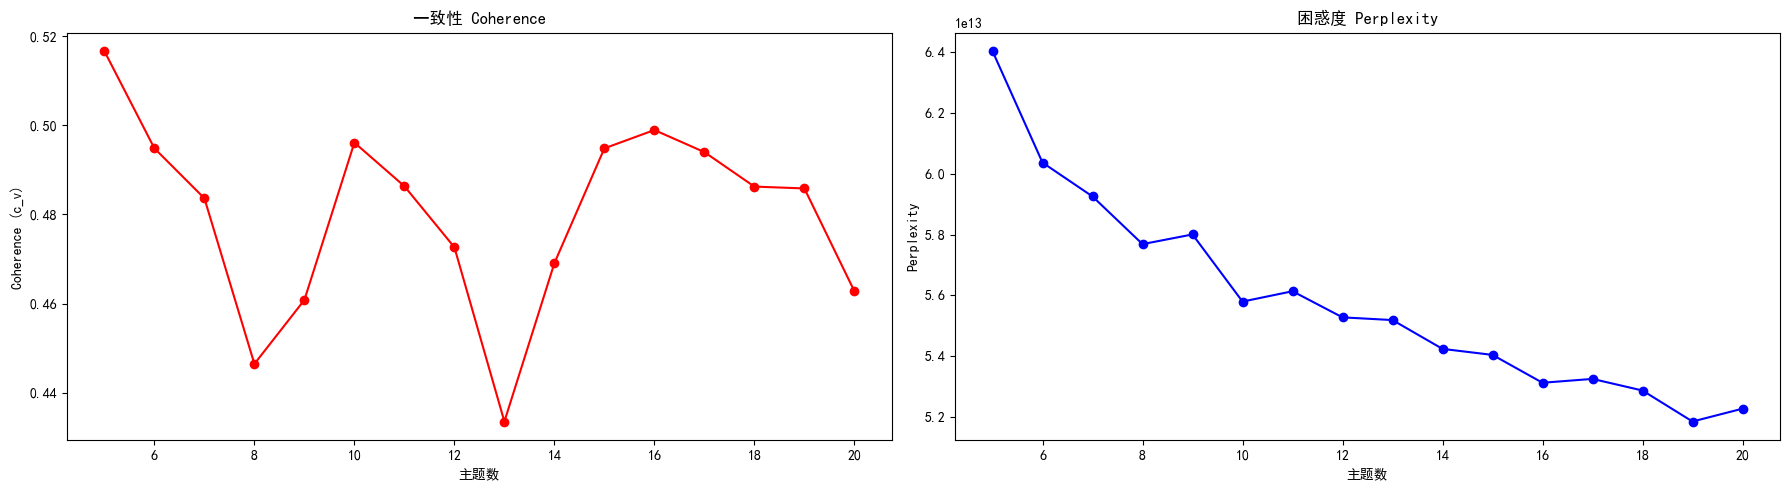

In [45]:
plt.figure(figsize=(18, 5))

topic_range = range(5, 21)

plt.subplot(1, 2, 1)
plt.plot(topic_range, coherences, marker='o', color='red')
plt.title("一致性 Coherence")
plt.xlabel("主题数")
plt.ylabel("Coherence (c_v)")

# plt.subplot(1, 3, 2)
# plt.plot(topic_range, log_likelihoods, marker='o', color='green')
# plt.title("似然度 Log Likelihood")
# plt.xlabel("主题数")
# plt.ylabel("Log Perplexity")

plt.subplot(1, 2, 2)
plt.plot(topic_range, perplexities, marker='o', color='blue')
plt.title("困惑度 Perplexity")
plt.xlabel("主题数")
plt.ylabel("Perplexity")

plt.tight_layout()
plt.show()

16的时候比较好

In [46]:
model_best = models_list[11]

In [ ]:
'看到', '觉得', '有点', '没有', '呈现', '知道', '可能', '应该', '不会', '不能', '问题', '感觉', '完全', '确实', '直接', '只能', '肯定', '无法', '继续', '存在', '导致', '现偶', '满满', '全都', '包含'

In [48]:
for topic_id, topic_words in model_best.show_topics(num_topics=-1, num_words=10, formatted=False):
    words_pro = []
    for word, prob in topic_words:
        words_pro.append(f"{word}({prob:.2f})")
    print(f"主题 {topic_id}:", " ".join(words_pro))

主题 0: 女主(0.27) 男主(0.22) 男女(0.06) 视角(0.02) 感情(0.02) 误会(0.02) 恋爱(0.02) 洗白(0.01) 营销(0.01) 工具(0.01)
主题 1: 演员(0.12) 演技(0.11) 角色(0.11) 台词(0.05) 表演(0.03) 情绪(0.02) 眼神(0.02) 表情(0.02) 表现(0.02) 演得(0.02)
主题 2: 喜欢(0.10) 编剧(0.06) 剧里(0.03) 结局(0.03) 导演(0.02) 希望(0.02) 地方(0.02) 戏份(0.02) 起来(0.02) 明显(0.02)
主题 3: 滤镜(0.31) 喜剧(0.14) 偶像剧(0.05) 好笑(0.05) 小品(0.03) 成人(0.03) 对准(0.03) 精美(0.02) 下饭(0.02) 熟人(0.02)
主题 4: 新颖(0.12) 衣服(0.09) 为主(0.07) 痕迹(0.06) 友好(0.05) 老套(0.04) 幼稚(0.03) 喜剧效果(0.02) 不小(0.02) 段子(0.02)
主题 5: 孩子(0.02) 理解(0.01) 生活(0.01) 现实(0.01) 需要(0.01) 家庭(0.01) 父母(0.01) 保护(0.01) 工作(0.01) 事情(0.01)
主题 6: 家属(0.06) 三观(0.06) 评分(0.04) 服装(0.04) 出身(0.04) 封神(0.02) 姐弟(0.02) 游戏(0.02) 高中生(0.02) 少见(0.02)
主题 7: 社会(0.07) 女性(0.06) 叙事(0.02) 现实(0.02) 时代(0.02) 家庭(0.02) 剧中(0.01) 成为(0.01) 保护(0.01) 意义(0.01)
主题 8: 观众(0.05) 剧中(0.03) 角色(0.03) 人物(0.02) 展现(0.02) 情感(0.02) 成长(0.02) 塑造(0.02) 刻画(0.01) 感受(0.01)
主题 9: 选择(0.03) 世界(0.02) 复仇(0.02) 人性(0.02) 善良(0.01) 身份(0.01) 行为(0.01) 成为(0.01) 内心(0.01) 悲剧(0.01)
主题 10: 口音(0.07) 热度(0.06) 难看(0.05) 国家

使用别的参数，虽然困惑度会比较好，但是可解释性很差。

| 主题编号 | 关键词（含权重）                                             | 主题标签                     | 判断依据                                                     |
| -------- | ------------------------------------------------------------ | ---------------------------- | ------------------------------------------------------------ |
| **0**    | 女主(0.27), 男主(0.22), 男女(0.06), 视角(0.02), 感情(0.02), 误会(0.02), 恋爱(0.02), 洗白(0.01), 营销(0.01), 工具(0.01) | **男女主**                   | 关键词集中在“男女主+感情+视角”，涉及“误会”“洗白”等恋爱套路   |
| **1**    | 演员(0.12), 演技(0.11), 角色(0.11), 台词(0.05), 表演(0.03), 情绪(0.02), 眼神(0.02), 表情(0.02), 表现(0.02), 演得(0.02) | **演技与台词**               | 典型的“演技评价型评论”，关注演员表现、台词、细节             |
| **2**    | 喜欢(0.10), 编剧(0.06), 剧里(0.03), 结局(0.03), 导演(0.02), 希望(0.02), 地方(0.02), 戏份(0.02), 起来(0.02), 明显(0.02) | **编剧**                     | 出现“编剧”“剧里”“结局”等词，体现观众对编剧的满意度           |
| **3**    | 滤镜(0.31), 喜剧(0.14), 偶像剧(0.05), 好笑(0.05), 小品(0.03), 成人(0.03), 对准(0.03), 精美(0.02), 下饭(0.02), 熟人(0.02) | **喜剧题材**                 | “喜剧”“偶像剧”“好笑”“小品”                                   |
| **4**    | 新颖(0.12), 衣服(0.09), 为主(0.07), 痕迹(0.06), 友好(0.05), 老套(0.04), 幼稚(0.03), 喜剧效果(0.02), 不小(0.02), 段子(0.02) | **新颖或老套**               | 对剧情是否“新颖”或“老套”的判断                               |
| **5**    | 孩子(0.02), 理解(0.01), 生活(0.01), 现实(0.01), 需要(0.01), 家庭(0.01), 父母(0.01), 保护(0.01), 工作(0.01), 事情(0.01) | **家庭责任**                 | 出现“孩子”“父母”“生活”等低频但聚焦词，表达对现实家庭关系的关注 |
| **6**    | 家属(0.06), 三观(0.06), 评分(0.04), 服装(0.04), 出身(0.04), 封神(0.02), 姐弟(0.02), 游戏(0.02), 高中生(0.02), 少见(0.02) | **价值观** | “三观”“出身”“评分”等体现社会评价视角                         |
| **7**    | 社会(0.07), 女性(0.06), 叙事(0.02), 现实(0.02), 时代(0.02), 家庭(0.02), 剧中(0.01), 成为(0.01), 保护(0.01), 意义(0.01) | **女性视角**                 | “社会+女性+现实”组合突出性别议题，强调现实主义表达           |
| **8**    | 观众(0.05), 剧中(0.03), 角色(0.03), 人物(0.02), 展现(0.02), 情感(0.02), 成长(0.02), 塑造(0.02), 刻画(0.01), 感受(0.01) | **角色塑造与成长**           | 聚焦“人物成长”“情感刻画”“观众感受”                           |
| **9**    | 选择(0.03), 世界(0.02), 复仇(0.02), 人性(0.02), 善良(0.01), 身份(0.01), 行为(0.01), 成为(0.01), 内心(0.01), 悲剧(0.01) | **人性**                     | 出现“复仇”“人性”“悲剧”“选择”等深层主题词                     |
| **10**   | 口音(0.07), 热度(0.06), 难看(0.05), 国家(0.05), 行业(0.05), 平台(0.04), 流量(0.04), 抄袭(0.03), 垃圾(0.03), 转移(0.03) | **热度与辣评**               | “热度”“流量”“抄袭”“垃圾”等为网络负评常见关键词               |
| **11**   | 镜头(0.05), 法律(0.05), 电视剧(0.05), 值得(0.04), 导演(0.04), 题材(0.04), 警察(0.03), 国产(0.02), 细节(0.02), 校园(0.02) | **警法题材**                 | “法律”“警察”“题材”体现类型化剧集的专业评价                   |
| **12**   | 故事(0.07), 人物(0.05), 逻辑(0.04), 情节(0.04), 设定(0.03), 部分(0.02), 设计(0.02), 主角(0.02), 剧情(0.02), 背景(0.02) | **故事与情节设定**           | “故事”“设定”“逻辑”“背景”属于结构性内容评价                   |
| **13**   | 剧情(0.18), 好看(0.06), 不错(0.04), 节奏(0.03), 主角(0.02), 搞笑(0.02), 配角(0.02), 吸引(0.02), 可爱(0.02), 精彩(0.02) | **剧情吸引力**               | 综合“剧情吸引力”“节奏感”“可看性”等方面                       |
| **14**   | 女子(0.06), 国色(0.05), 芳华(0.05), 音乐(0.05), 家族(0.04), 恐怖(0.04), 布景(0.04), 服饰(0.03), 宝宝(0.03), 大陆(0.03) | **古风与艺术**               | “音乐“”布景”构成古风/氛围剧审美取向                          |
| **15**   | 女生(0.09), 美学(0.07), 评论(0.06), 标题(0.04), 接触(0.04), 俗套(0.03), 傻子(0.03), 资本(0.03), 美丽(0.03), 拍出(0.03) | **美学**                     | “女生”“美学”“拍出”“评论”等多为观众主观评价与视觉倾向         |

In [8]:
topic_names = {
    0:'男女主',
    1:'演技与台词',
    2:'编剧',
    3:'喜剧题材',
    4:'新颖或老套',
    5:'家庭责任',
    6:'价值观',
    7:'女性视角',
    8:'角色塑造与成长',
    9:'人性',
    10:'热度与辣评',
    11:'警法题裁',
    12:'故事与情节设定',
    13:'剧情吸引力',
    14:'古风与艺术',
    15:'美学'
}

### pyLDAvis

In [51]:
import pyLDAvis
import pyLDAvis.gensim_models

vis_data = pyLDAvis.gensim_models.prepare(model_best, corpus, dictionary)

In [55]:
pyLDAvis.save_html(vis_data, './result/lda_vis_tp16_jieba.html')

In [53]:
model_best.save('./model/best_lda_tp16_jieba.model')

In [54]:
dictionary.save('./model/lda_jieba_dictionary.dict')
corpora.MmCorpus.serialize('./model/lda_jieba_corpus.mm', corpus)

### 词云

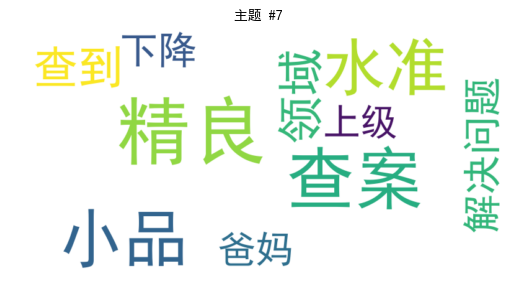

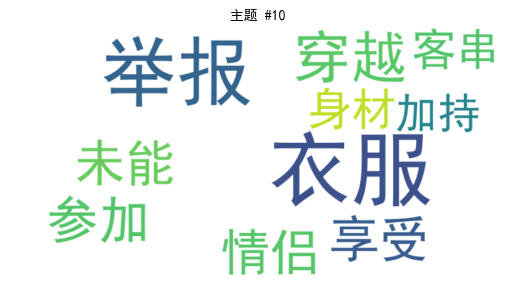

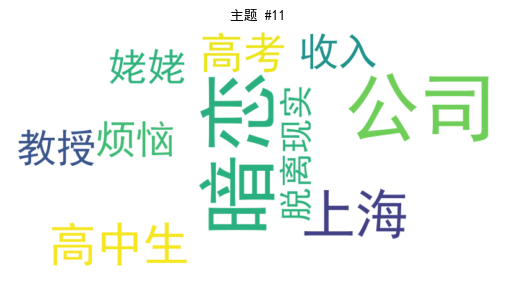

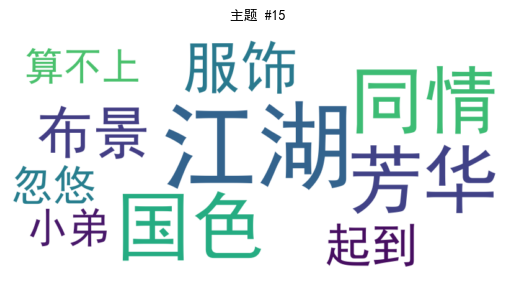

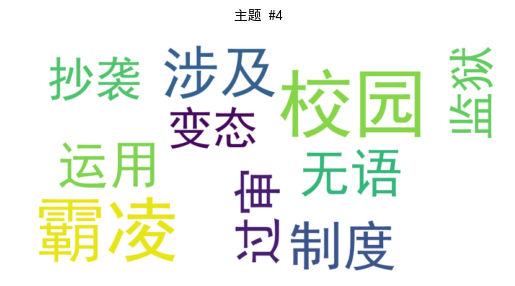

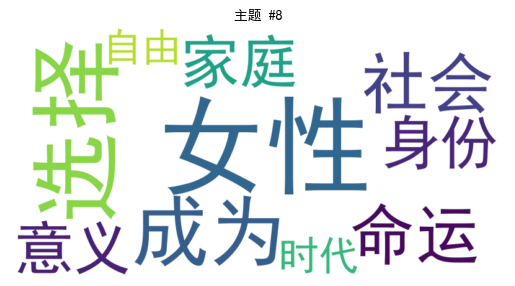

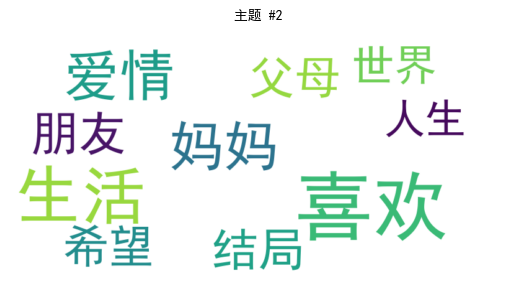

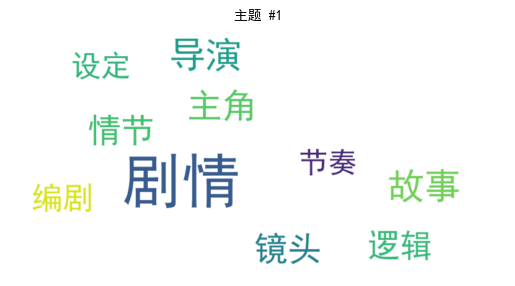

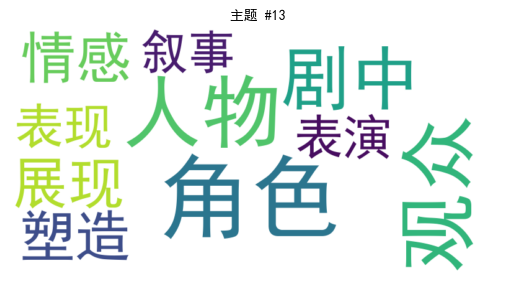

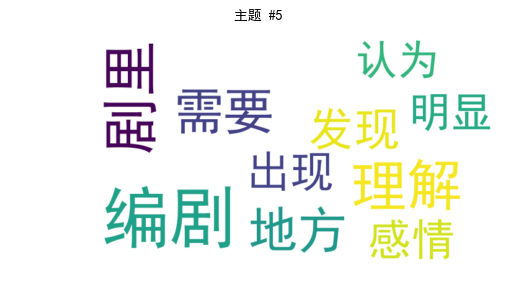

In [64]:
from wordcloud import WordCloud

font_path = "C:/Windows/Fonts/simhei.ttf"

for i, topic in model_best.show_topics(formatted=False):
    word_freq = dict(topic)
    wc = WordCloud(
        font_path=font_path,        # ✅ 指定中文字体
        width=800,
        height=400,
        background_color='white'
    ).generate_from_frequencies(word_freq)

    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"主题 #{i}", fontproperties="SimHei")  # 设置中文标题时也要考虑字体
    plt.show()

In [57]:
doc_topics = [model_best.get_document_topics(bow) for bow in corpus]

In [58]:
len(doc_topics)

10665

In [87]:
real_id = range(len(balanced_rdf))

In [88]:
def showDocTopics(model, corpus, rdf, i):
    doc_topics = model.get_document_topics(corpus[i])
    major_topics = [{'主题':topic_names[tp], '概率':prob} for tp, prob in doc_topics if prob > 0.05]
    major_topics_df = pd.DataFrame.from_records(major_topics)
    major_topics_df['归一化'] = major_topics_df['概率'] / major_topics_df['概率'].sum()
    major_topics_df['原始评论id'] = rdf.iloc[i]['评论id']
    major_topics_df['新id'] = real_id[i]
    major_topics_df['评论内容'] = rdf.iloc[i]['评论内容']
    major_topics_df['分词'] = rdf.iloc[i]['cutted']
    major_topics_df['电视剧名称'] = rdf.iloc[i]['电视剧名称']
    return major_topics_df

In [89]:
dflist = []
for i in range(len(corpus)):
    doc_tp_df = showDocTopics(model_best, corpus, balanced_rdf, i)
    dflist.append(doc_tp_df)
topics_df = pd.concat(dflist, axis=0, ignore_index=True)
topics_df

,主题,概率,归一化,原始评论id,新id,评论内容,分词,电视剧名称
0,演技与台词,0.206119,0.225032,16510360,0,1.观看了前5集的剪辑版，整体体验很好，感觉像看了一场电影，直观感觉是中等偏上。2.关于演员...,观看 前集 剪辑版 整体 体验 电影 直观 演员 表演 吴越 老师 优秀 青春 演出 颇具 ...,180天重启计划
1,编剧,0.059256,0.064693,16510360,0,1.观看了前5集的剪辑版，整体体验很好，感觉像看了一场电影，直观感觉是中等偏上。2.关于演员...,观看 前集 剪辑版 整体 体验 电影 直观 演员 表演 吴越 老师 优秀 青春 演出 颇具 ...,180天重启计划
2,家庭责任,0.205473,0.224327,16510360,0,1.观看了前5集的剪辑版，整体体验很好，感觉像看了一场电影，直观感觉是中等偏上。2.关于演员...,观看 前集 剪辑版 整体 体验 电影 直观 演员 表演 吴越 老师 优秀 青春 演出 颇具 ...,180天重启计划
3,角色塑造与成长,0.062876,0.068645,16510360,0,1.观看了前5集的剪辑版，整体体验很好，感觉像看了一场电影，直观感觉是中等偏上。2.关于演员...,观看 前集 剪辑版 整体 体验 电影 直观 演员 表演 吴越 老师 优秀 青春 演出 颇具 ...,180天重启计划
4,警法题裁,0.063480,0.069305,16510360,0,1.观看了前5集的剪辑版，整体体验很好，感觉像看了一场电影，直观感觉是中等偏上。2.关于演员...,观看 前集 剪辑版 整体 体验 电影 直观 演员 表演 吴越 老师 优秀 青春 演出 颇具 ...,180天重启计划
...,...,...,...,...,...,...,...,...
72149,编剧,0.070316,0.089940,16703171,10664,《无尽的尽头》前6集真的太对我胃口了。本以为是一部全程严肃的法律剧，没想到竟然很平衡，趣味性...,前集 胃口 全程 严肃 法律 平衡 趣味性 沉重 主题 增添 色彩 严肃 突破 传统 法律 ...,﻿无尽的尽头
72150,家庭责任,0.330457,0.422683,16703171,10664,《无尽的尽头》前6集真的太对我胃口了。本以为是一部全程严肃的法律剧，没想到竟然很平衡，趣味性...,前集 胃口 全程 严肃 法律 平衡 趣味性 沉重 主题 增添 色彩 严肃 突破 传统 法律 ...,﻿无尽的尽头
72151,角色塑造与成长,0.100588,0.128660,16703171,10664,《无尽的尽头》前6集真的太对我胃口了。本以为是一部全程严肃的法律剧，没想到竟然很平衡，趣味性...,前集 胃口 全程 严肃 法律 平衡 趣味性 沉重 主题 增添 色彩 严肃 突破 传统 法律 ...,﻿无尽的尽头
72152,警法题裁,0.073887,0.094508,16703171,10664,《无尽的尽头》前6集真的太对我胃口了。本以为是一部全程严肃的法律剧，没想到竟然很平衡，趣味性...,前集 胃口 全程 严肃 法律 平衡 趣味性 沉重 主题 增添 色彩 严肃 突破 传统 法律 ...,﻿无尽的尽头


In [90]:
topics_df.to_csv('./result/tp_doc_tp16_jieba.csv', index=False, encoding='utf-8-sig')

In [2]:
topics_df = pd.read_csv('./result/tp_doc_tp16_jieba.csv')

### 主题-文档分布

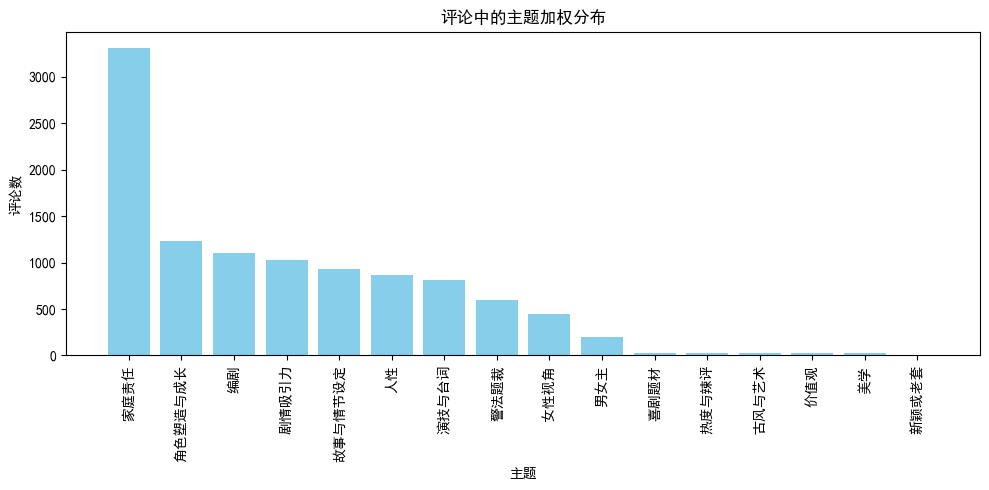

In [79]:
tp_docs = topics_df.groupby('主题')['归一化'].sum().reset_index()
tp_docs.sort_values(by='归一化', ascending=False, inplace=True)

plt.figure(figsize=(10, 5))
plt.bar(tp_docs['主题'], tp_docs['归一化'], color='skyblue')
plt.xlabel("主题")
plt.ylabel("评论数")
plt.title("评论中的主题加权分布")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [6]:
import seaborn as sns

plt.rcParams['font.family'] = 'SimHei'      # 中文字体（如黑体）
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

In [11]:
db_dramas = ['无尽的尽头', '异人之下之决战！碧游村', '鹊刀门传奇 第二季', '沙尘暴', '树下有片红房子', '180天重启计划', '国色芳华', '致1999年的自己', '三叉戟2', '无忧渡', '锦囊妙录', '棋士', '人生若如初见', '滤镜', '护宝寻踪', '余烬之上', '藏海传', '仙台有数', '北上', '黄雀', '千朵桃花一世开', '无所畏惧之永不放弃']

In [12]:
topics_pt = topics_df.pivot_table(index=['电视剧名称', '新id'], columns='主题', values='归一化', aggfunc='sum').fillna(0)
order = list(topic_names.values())
topics_pt = topics_pt[order]

topics_pt_mean = topics_pt.reset_index().groupby('电视剧名称').mean()
topics_pt_mean.index = topics_pt_mean.index.astype(str).str.replace('\ufeff', '', regex=True)
topics_pt_mean.columns = topics_pt_mean.columns.astype(str).str.replace('\ufeff', '', regex=True)
topics_pt_mean.drop('新id', axis=1, inplace=True)
overall_mean = topics_pt_mean.values.mean(axis=0)
normalized = topics_pt_mean / overall_mean
normalized = normalized.reindex(db_dramas)

plt.figure(figsize=(12, 10))
sns.heatmap(
    normalized, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5, 
    vmin=0,          # 色带最小值
    vmax=2,         # 色带最大值
    center=1,        # 色带中点（中性颜色处）
    cbar_kws={'label': '相对整体平均值'}
)
plt.title('电视剧-主题分布')
plt.xlabel(topics_pt.columns.name)
plt.ylabel(topics_pt.index.name)
plt.tight_layout()
plt.savefig(f"./img/电视剧-主题分布（区位熵）", dpi=300, bbox_inches='tight') 
plt.close()

In [10]:
normalized

主题,男女主,演技与台词,编剧,喜剧题材,新颖或老套,家庭责任,价值观,女性视角,角色塑造与成长,人性,热度与辣评,警法题裁,故事与情节设定,剧情吸引力,古风与艺术,美学
电视剧名称,,,,,,,,,,,,,,,,
180天重启计划,0.720070,0.872467,0.813447,0.963936,2.918699,1.369337,2.582343,1.130865,0.813122,0.830819,2.127132,0.710279,0.781397,0.733901,1.287630,2.375483
三叉戟2,0.322191,1.111895,1.226557,1.492243,1.812525,0.955348,2.279451,0.549274,0.906909,0.672107,1.791046,1.210055,1.070582,1.270990,0.289513,1.410772
人生若如初见,0.839795,1.225061,0.793301,0.154867,0.818301,0.899313,0.363517,2.778289,1.116291,1.253680,0.930489,0.746587,0.888036,0.610737,0.266668,0.492988
仙台有数,2.215431,1.262707,0.856259,0.169334,2.070654,0.767804,0.733458,0.430152,1.323581,1.059922,0.271219,1.189293,0.917370,1.290370,0.387065,0.593293
余烬之上,0.279012,0.874805,1.030803,0.620507,1.331774,1.038767,1.075466,0.946642,0.823867,1.163195,1.409321,1.145082,1.139444,0.946902,0.714809,2.082824
北上,0.389024,0.870961,0.780562,0.471512,0.287572,0.983476,0.581062,2.162944,1.513784,0.876936,0.524204,0.903387,0.795126,0.810494,0.240918,0.978810
千朵桃花一世开,3.228008,0.917774,1.456728,0.137692,1.823051,0.828031,1.147315,0.376132,0.741607,0.930166,1.374186,1.003578,1.036902,1.310973,0.348706,0.951346
国色芳华,1.636261,0.945770,0.609712,0.042078,0.431766,0.868480,0.500263,2.075374,1.361499,0.941078,0.307823,0.903740,0.752334,0.984569,13.439574,0.652497
异人之下之决战！碧游村,0.181512,1.548795,1.266821,0.189234,0.702726,0.860609,0.566751,0.530112,0.939449,1.107189,1.097645,0.953714,1.120249,1.029139,0.578085,0.765172


# BERTopic

In [12]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from collections import Counter

# 适合中文任务，性能和速度较优
embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

## 原始评论

In [4]:
rdf.head()

,评论id,评论内容,来源,电视剧名称
0,318794163,标题：不知道这部剧里又会callback李导的哪部剧？,group,180天重启计划
1,318817291,脸型发型在努力靠近了，痞帅风；看预告感觉陈老师打扮得挺潮的；我觉得还蛮像的诶；还行。陈老年之...,group,180天重启计划
2,319246594,顾云苏就是所有普通女生的一个缩影，很能让人共情到的一个女主。她跟男朋友吵架的时候，说的不是‘...,group,180天重启计划
3,319311077,剧本设置得很好，突出了女性在婚姻中情感需求的重要性，展现了非传统离婚原因的现实困境。剧中吴俪...,group,180天重启计划
4,319239987,连追四集，太精彩了，周雨彤一人分饰两角，拿捏到位，绝不串戏，感觉她演技又进步了！好剧好演员，...,group,180天重启计划


需要针对每个电视剧进行主题建模

In [15]:
drama_topics = {}
tp_models = []

for drama, group in rdf.groupby('电视剧名称'):
    docs = group['评论内容'].tolist()
    topic_model = BERTopic(embedding_model=embedding_model, language="multilingual") 
    topics, _ = topic_model.fit_transform(docs)
    tp_models.append(topic_model)
    topic_info = topic_model.get_topic_info()
    keywords_by_topic = {
        row['Topic']: topic_model.get_topic(row['Topic']) for _, row in topic_info.iterrows() if row['Topic'] != -1
    }
    topic_counts = Counter(topics)
    topic_proportions = {
        topic: count for topic, count in topic_counts.items() if topic != -1
    }
    drama_topics[drama] = {
        "keywords": keywords_by_topic,
        "counts": topic_proportions
    }

In [17]:
drama_topics['180天重启计划']

{'keywords': {0: [('不影响', 0.01069521382699503),
   ('180天重启计划', 0.008284420677782466),
   ('的时候', 0.006158285238566982),
   ('大女主', 0.006158285238566982),
   ('180天', 0.005674732028485593),
   ('对啊', 0.005110468487520784),
   ('我在他乡挺好的', 0.004442947361904631),
   ('但是', 0.004356366952456995),
   ('是的', 0.004023657763106815),
   ('周雨彤演得太好了', 0.004010701607473805)],
  1: [('180天重启计划', 0.009354250294447149),
   ('妈妈', 0.0074641191466785),
   ('为了', 0.007116424390697111),
   ('9分', 0.006800854218008428),
   ('爱情', 0.006556205207828233),
   ('是的', 0.0053545599462883),
   ('让人又哭又笑', 0.005040950787408245),
   ('我得不到应有的尊重', 0.005040950787408245),
   ('重启人生', 0.005040950787408245),
   ('便没有了意义', 0.005040950787408245)],
  2: [('16529625', 0.18933828156864876),
   ('这里想表达的不是违不违法的问题', 0.18933828156864876),
   ('emmm我看你发好几个帖子了', 0.18933828156864876),
   ('16594459', 0.18933828156864876),
   ('180天重启计划真的很好看', 0.18933828156864876),
   ('我吃', 0.18933828156864876),
   ('但是为了继续看下去忍了', 0.1893382815686487

In [6]:
topic_model = BERTopic(embedding_model=embedding_model, language="multilingual") 
topics, probs = topic_model.fit_transform(documents)

In [10]:
topic_model_reduced = topic_model.reduce_topics(documents, nr_topics=40)

In [11]:
# 查看所有主题及其关键词
topic_model_reduced.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,13472,-1_藏海传_国色芳华_无忧渡_是的,"[藏海传, 国色芳华, 无忧渡, 是的, 仙台有树, 滤镜, 全员演技在线, 剧情紧凑, 此...",[《藏海传》与《盗墓笔记》在我心中存在着一定联系。藏海饰演者肖战表现出色的演技，比如在‘坟场...
1,0,1955,0_滤镜_滤镜手镯_全员演技在线_ep2,"[滤镜, 滤镜手镯, 全员演技在线, ep2, 剧情紧凑, 此外, 环环相扣, 颜值即正义,...",[《滤镜》是价值观特别正的网络剧，内核很美，越看越温馨，讲的是我爱你与美貌、学识、年龄、性别...
2,1,1441,1_国色芳华_仙台有树_藏海传_无忧渡,"[国色芳华, 仙台有树, 藏海传, 无忧渡, 剧情紧凑, 此外, 情节环环相扣, 节奏紧凑不...",[《藏海传》质感超绝！复仇权谋双线并行，朝堂风云诡谲，藏海步步为营。肖战演技细腻，将角色的复...
3,2,524,2_国色芳华_不影响_是的_北上,"[国色芳华, 不影响, 是的, 北上, 异人, 在面对王擎的毒打时迅速, 能在夜里搬花, 有...",[杨紫演的太好了，国色芳华真的开年好剧了！一集更比一集强！何惟芳真的是女人中的女人！很机敏睿...
4,3,508,3_藏海传_所以_在波谲云诡的权谋斗争里_如何在这复仇之路上坚守本心,"[藏海传, 所以, 在波谲云诡的权谋斗争里, 如何在这复仇之路上坚守本心, 看他凭借智慧与勇...",[很意外会在这部原本毫无期待的剧集里体会到久违的泪如雨下。昭明和魔尊从来都是一个人，虽然魔尊...
5,4,479,4_国色芳华_做自己真正想做的事_努力长出翅膀飞出牢笼_并寻找属于自己的天地,"[国色芳华, 做自己真正想做的事, 努力长出翅膀飞出牢笼, 并寻找属于自己的天地, 认定了目...",[这部剧的评分不该成为粉圈黑子手下的牺牲品，好不容易有了一部好剧，我个人觉得是这10几年以来...
6,5,400,5_沙尘暴_藏海传_漫长的季节_剧情,"[沙尘暴, 藏海传, 漫长的季节, 剧情, 妹妹月奴的死让人气血飚升, 接下来就是灭门惨案,...",[由段奕宏领衔主演的西北悬疑剧《沙尘暴》，真的是越看越精彩。《沙尘暴》不仅是一部犯罪悬疑剧，...
7,6,369,6_仙台有树_藏海传_滤镜_一个被爱感化逐渐温柔的捉妖师,"[仙台有树, 藏海传, 滤镜, 一个被爱感化逐渐温柔的捉妖师, 无忧渡演员的演绎融入角色, ...",[无忧渡演员的演绎融入角色，在剧里他就是久宣夜，就是一个捉妖师，一个被爱感化逐渐温柔的捉妖师...
8,7,336,7_沙尘暴_父亲_王良_刘三成,"[沙尘暴, 父亲, 王良, 刘三成, 刘大志, 但是, 又老又瘸, 另外, 可是, 丁宝元]",[俞天白和秋红相处的时间里，比起月亮，他始终更像是太阳，他炽热、燃烧，有着无法被忽视的存在感...
9,8,271,8_树下有片红房子_红房子_北上_友情,"[树下有片红房子, 红房子, 北上, 友情, 致1999年的自己, 陈欢尔, 欢尔, 祁琪,...",[《红房子》是群像侧写，是一群人从少年到大好青年的成长故事。这里面没有完美的人，即便是看上去...


In [ ]:
def getTF_vectorizer(cutted):
    n_features = 3000
    # 将文本数据转换为词频向量矩阵
    tf_vectorizer = CountVectorizer(
        strip_accents='unicode',               # 去除文本中的重音符号
        max_features=n_features,               # 提取的最大特征数（词语数）为1000
        max_df=0.5,                            # 忽略在超过50%的文档中出现的词语
        min_df=0.01                              # 至少出现次数，去除罕见的词语，避免过拟合
    )
    tf = tf_vectorizer.fit_transform(cutted)
    return tf, tf_vectorizer

In [37]:
tf, tf_vectorizer = getTF_vectorizer(balanced_rdf.cutted)

In [ ]:
n_max_topics = 20
plexs = []
scores = []

for i in range(5, n_max_topics):
    lda = LatentDirichletAllocation(
        n_components=i, 
        max_iter=100,
        learning_method='batch',
        topic_word_prior=0.01,
        random_state=0
    )
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))  # 计算困惑度
    scores.append(lda.score(tf))      # 计算似然分数

In [6]:
hanlp_pipeline = hanlp.load('OPEN_TOK_POS_NER_SRL_DEP_SDP_CON_ELECTRA_BASE_ZH')

In [14]:
hanlp_pipeline('其实', tasks='pos')

{'tok': ['其实'], 'pos': ['AD']}

In [21]:
def word_cut_label(text):
    text = re.sub(r"[^\u4e00-\u9fa5]", "", text)
    result = hanlp_pipeline(text, tasks='pos')
    use = [tok for tok, pos in zip(result['tok'], result['pos']) if tok not in stopwords and pos not in ['CS', 'CC', 'M', 'CD', 'ETC', 'IJ', 'SP', 'OD', 'VE', 'AD', 'BA']]
    return " ".join(use)

In [22]:
rdf['cutted'] = rdf['评论内容'].apply(word_cut_label)

In [24]:
rdf['cutted'] = rdf['cutted'].apply(lambda x: " ".join([word for word in x.split(" ") if len(word)>1]))

In [26]:
rdf['count'] = rdf['cutted'].apply(lambda x: len(x.split(" ")))

In [28]:
rdf_use = rdf[rdf['count']>10].copy()

In [30]:
rdf_use.groupby('电视剧名称')['评论id'].count().reset_index()

,电视剧名称,评论id
0,180天重启计划,314
1,三叉戟2,216
2,人生若如初见,725
3,仙台有数,1914
4,余烬之上,336
5,北上,698
6,千朵桃花一世开,482
7,国色芳华,2436
8,异人之下之决战！碧游村,494
9,护宝寻踪,249


In [32]:
def balance_reviews(df, n_samples=250):
    balanced = []
    for name, group in df.groupby('电视剧名称'):
        if len(group) >= n_samples:
            sampled = resample(group, n_samples=n_samples, replace=False, random_state=42)
        else:
            sampled = resample(group, n_samples=n_samples, replace=True, random_state=42)
        balanced.append(sampled)
    return pd.concat(balanced, ignore_index=True)

In [33]:
balanced_rdf = balance_reviews(rdf, n_samples=250)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [35]:
def getTF_vectorizer(cutted):
    n_features = 1000
    # 将文本数据转换为词频向量矩阵
    tf_vectorizer = CountVectorizer(
        strip_accents='unicode',               # 去除文本中的重音符号
        max_features=n_features,               # 提取的最大特征数（词语数）为1000
        stop_words='english',                  # 移除所有英文停用词
        max_df=0.5,                            # 忽略在超过50%的文档中出现的词语
        min_df=50                              # 词语至少在10个文档中出现才能被考虑，去除罕见的词语，避免过拟合
    )
    tf = tf_vectorizer.fit_transform(cutted)
    return tf, tf_vectorizer

In [36]:
tf, tf_vectorizer = getTF_vectorizer(balanced_rdf.cutted)

In [41]:
n_topics = 10

lda = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=50,                         # 指定模型应该识别的主题数和算法的最大迭代次数
    learning_method='batch',               # 指定学习方法，'batch' 方法通常更稳定，'batch' 意味着使用所有的数据点来更新模型的参数，相对于 'online' 方法（逐步使用小批量数据更新模型）
    # learning_offset=50,                    # 用于稳定在线学习的早期迭代
    # doc_topic_prior=0.1,                 # 文档-主题先验，即α值
    topic_word_prior=0.01,               # 主题-词先验，即β值
    random_state=42                        # 设置一个随机种子用于结果的可复现性
)

# 通过fit方法训练模型，找到最佳的文档-主题和主题-词分布
lda.fit(tf)

LatentDirichletAllocation(max_iter=50, random_state=42, topic_word_prior=0.01)

In [38]:
def print_top_words(model, feature_names, n_top_words):
    tword = []
    # 遍历模型的每个主题
    for topic_idx, topic in enumerate(model.components_):  # topic_idx 是主题的索引，topic是一个包含词权重的数组
        print("Topic #%d:" % topic_idx)
        topic_w = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])   # 返回基于权重排序后的词语索引数组，权重最大的词语索引排在前面
        tword.append(topic_w)
        print(topic_w)
    return tword

In [42]:
n_top_words = 25
tf_feature_names = tf_vectorizer.get_feature_names_out()
topic_word = print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
女主 剧情 男主 滤镜 苏易水 演技 非常 真的 特效 唐奇 没有 沐清歌 邓为 男女主 在线 仙台 设定 好看 人设 师父 值得 世界 苏橙橙 徒弟 仙侠剧
Topic #1:
第二 第一 何惟芳 第三 喜剧 希望 三叉戟 女子 杨紫 鹊刀门 期待 看到 应该 牡丹 喜欢 故事 江湖 国色芳华 武侠 继续 值得 搞笑 笑点 女性 没有
Topic #2:
历史 社会 梁乡 李现 革命 孩子 没有 未成年人 犯罪 菽红 法律 杨凯之 现实 保护 女性 案件 检察官 中国 教育 无尽 尽头 人生 问题 林之桃 吴天白
Topic #3:
崔业 最后 可能 知道 没有 警察 案子 罗英子 夏生 应该 觉得 陈硕 已经 哥哥 真的 邱华 第一 律师 孩子 看到 肯定 犯罪 医生 儿子 证据
Topic #4:
角色 人物 观众 剧情 故事 展现 情感 藏海 运河 演员 叙事 塑造 时代 真实 生活 成长 情节 表演 表现 演技 饰演 剧集 演绎 细节 细腻
Topic #5:
男主 女主 男二 谢雪臣 宣夜 没有 昭明 半夏 结局 真的 天命 男女主 魔尊 最后 女二 喜欢 其实 人设 觉得 桃花 阿珠 现在 一直 知道 加戏
Topic #6:
剧情 编剧 没有 人物 感觉 觉得 问题 观众 后面 角色 逻辑 情节 最后 应该 故事 完全 有点 其实 塑造 合理 可能 确实 人设 主角 导演
Topic #7:
喜欢 没有 妈妈 真的 生活 觉得 肖涵 孩子 家庭 女性 吴俪梅 其实 一起 女儿 人生 女主 爱情 知道 看到 朋友 陈末 现实 关系 选择 顾云苏
Topic #8:
王良 陈朵 选择 刘盈盈 没有 佛爷 孙彩云 刘三成 最后 男人 女人 自由 人性 丁宝元 母亲 异人 程春 张楚岚 女性 世界 理解 沙尘暴 知道 马仙洪 无法
Topic #9:
真的 演员 演技 角色 觉得 感觉 喜欢 好看 没有 不错 导演 特别 台词 第一 有点 非常 确实 看到 现在 其实 诸葛青 剧情 知道 戏份 应该


In [44]:
n_max_topics = 20
plexs = []
scores = []

for i in range(5, n_max_topics):
    lda = LatentDirichletAllocation(
        n_components=i, max_iter=100,
        learning_method='batch',
        topic_word_prior=0.01,
        random_state=0
    )
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))  # 计算困惑度
    scores.append(lda.score(tf))      # 计算似然分数

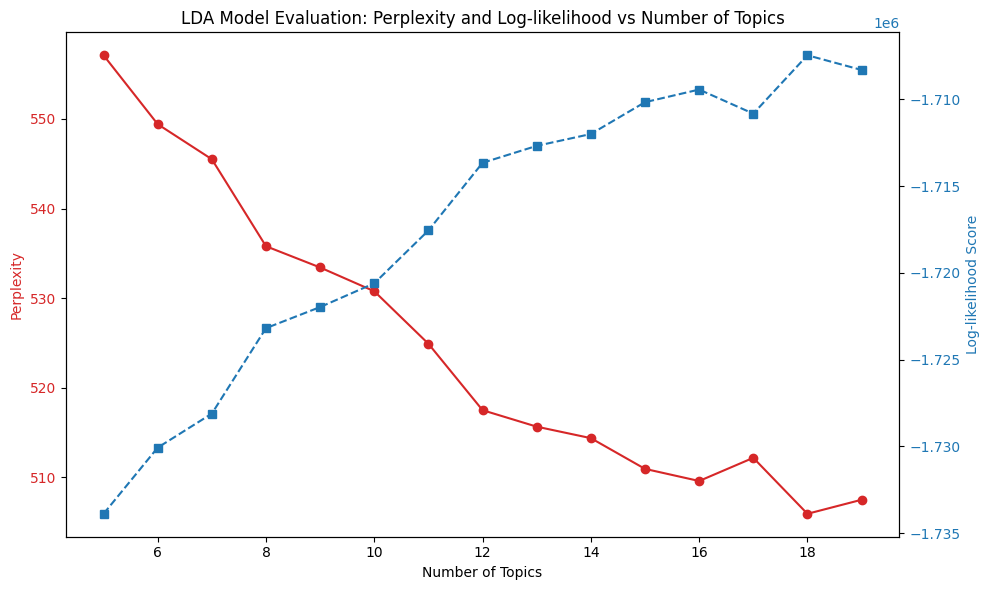

In [46]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制困惑度
color = 'tab:red'
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Perplexity', color=color)
ax1.plot(range(5, n_max_topics), plexs, marker='o', linestyle='-', color=color, label='Perplexity')
ax1.tick_params(axis='y', labelcolor=color)

# 创建第二个坐标轴，共享x轴
ax2 = ax1.twinx()

# 绘制对数似然分数
color = 'tab:blue'
ax2.set_ylabel('Log-likelihood Score', color=color)
ax2.plot(range(5, n_max_topics), scores, marker='s', linestyle='--', color=color, label='Log-likelihood')
ax2.tick_params(axis='y', labelcolor=color)

# 标题与图例
plt.title('LDA Model Evaluation: Perplexity and Log-likelihood vs Number of Topics')
fig.tight_layout()
plt.show()

In [47]:
n_topics = 18

lda = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=50,                         # 指定模型应该识别的主题数和算法的最大迭代次数
    learning_method='batch',               # 指定学习方法，'batch' 方法通常更稳定，'batch' 意味着使用所有的数据点来更新模型的参数，相对于 'online' 方法（逐步使用小批量数据更新模型）
    # learning_offset=50,                    # 用于稳定在线学习的早期迭代
    # doc_topic_prior=0.1,                 # 文档-主题先验，即α值
    topic_word_prior=0.01,               # 主题-词先验，即β值
    random_state=42                        # 设置一个随机种子用于结果的可复现性
)

# 通过fit方法训练模型，找到最佳的文档-主题和主题-词分布
lda.fit(tf)

LatentDirichletAllocation(max_iter=50, n_components=18, random_state=42,
                          topic_word_prior=0.01)

In [49]:
n_top_words = 10
tf_feature_names = tf_vectorizer.get_feature_names_out()
topic_word = print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
滤镜 唐奇 剧情 爱情 世界 苏橙橙 女性 檀健次 设定 真实
Topic #1:
何惟芳 第二 第一 喜剧 三叉戟 杨紫 女子 鹊刀门 剧情 牡丹
Topic #2:
女主 男主 男二 人设 没有 女二 男女主 后面 喜欢 剧情
Topic #3:
崔业 罗英子 夏生 陈硕 案子 律师 崔伟 许卓 棋士 最后
Topic #4:
角色 观众 剧情 人物 藏海 演员 演技 情感 展现 表演
Topic #5:
谢雪臣 昭明 天命 魔尊 桃花 阿珠 小说 暮悬铃 没有 编剧
Topic #6:
剧情 人物 没有 角色 编剧 故事 逻辑 情节 塑造 观众
Topic #7:
女性 妈妈 孩子 没有 吴俪梅 女儿 母亲 选择 觉得 顾云苏
Topic #8:
时代 运河 生活 北上 文化 故事 历史 展现 成长 真实
Topic #9:
演技 真的 演员 角色 好看 感觉 喜欢 非常 特别 不错
Topic #10:
社会 案件 现实 犯罪 法律 未成年人 人性 正义 女性 保护
Topic #11:
喜欢 肖涵 没有 真的 陈末 朋友 一起 欢尔 生活 青春
Topic #12:
觉得 感觉 真的 应该 现在 没有 第一 其实 导演 演员
Topic #13:
王良 刘盈盈 孙彩云 刘三成 丁宝元 没有 程春 沙尘暴 男人 刘大志
Topic #14:
历史 梁乡 李现 邱华 革命 角色 菽红 杨凯之 人物 人生
Topic #15:
陈朵 苏易水 特效 沐清歌 邓为 选择 异人 仙台 张楚岚 师父
Topic #16:
没有 知道 可能 应该 警察 觉得 最后 编剧 孩子 后面
Topic #17:
宣夜 结局 最后 半夏 没有 廖知白 廖思远 哥哥 无忧渡 世界
